#Example Weibull Type I

In [1]:
install.packages("survival")
devtools::install_github("dlsaavedra/rcens")
library(rcens)
library(survival)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpxFDqAq/remotes20b3a1f384/dlsaavedra-rcens-c233bd0/DESCRIPTION’ ... OK
* preparing ‘rcens’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘rcens_0.1.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Right-Censored Plot KM

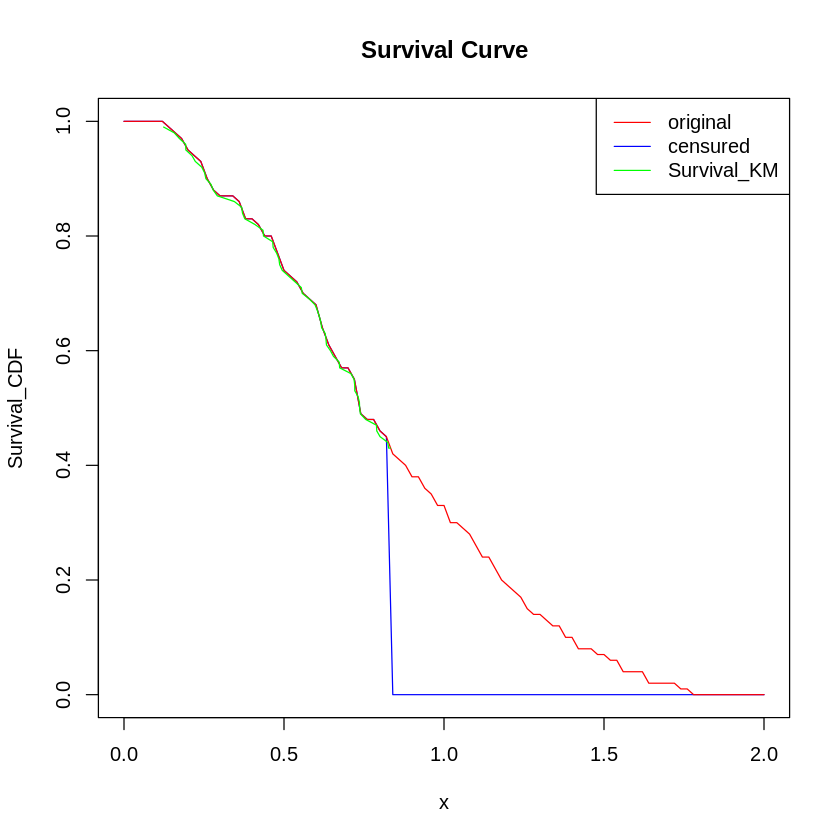

In [2]:


alpha = 2
beta = 1
scale = beta ** (-1/alpha )
theta = .5


#Data = rcensT1(rdistrX = rweibull,param_X = list("shape" = alpha, "scale" = scale ),
 #                n = 1e02, t_censored = 1,right = TRUE)
Data = rcensT1(rdistrX = rweibull,param_X = list("shape" = alpha, "scale" = scale ),
                 n = 1e02, theta = theta, qdistrX = qweibull, right = TRUE)

S = Surv(Data$sample_censored,Data$censored_indicator, type = "right")
s1 = survfit(S ~ 1)

CDF_censored = ecdf(Data$sample_censored)
Survival_CDF = Vectorize(function(x){ 1 - CDF_censored(x)})
CDF_original= ecdf(Data$sample_uncensored)
Survival_CDF_original = Vectorize(function(x){ 1 - CDF_original(x)})

plot(Survival_CDF, col = "blue", xlim = c(0,2))
title("Survival Curve")
plot(Survival_CDF_original, col = "red", add= TRUE, xlim = c(0,2))
lines(s1$time, s1$surv, col = "green", xlim = c(0,2))
legend("topright",c("original","censured", "Survival_KM"),
       col = c("red", "blue", "green"), lty = 1)




##Left-Censored Plot KM

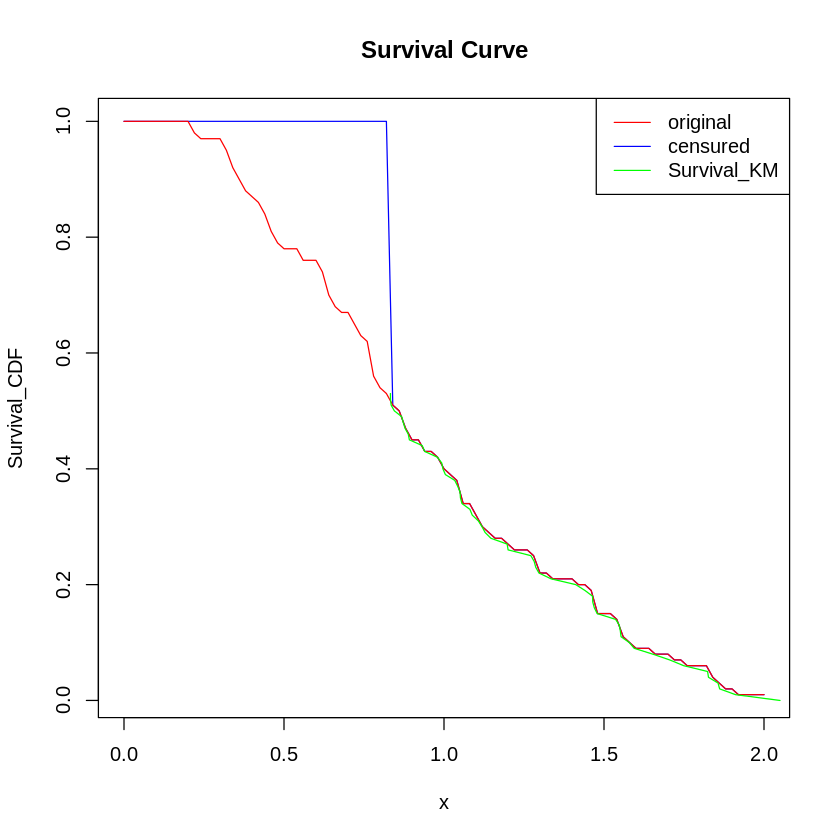

In [3]:
#Data = rcensT1(rdistrX = rweibull,param_X = list("shape" = alpha, "scale" = scale ),
 #                n = 1e02, t_censored = 1,right = FALSE)
Data = rcensT1(rdistrX = rweibull,param_X = list("shape" = alpha, "scale" = scale ),
                 n = 1e02, theta = theta, qdistrX = qweibull, right = FALSE)

S = Surv(Data$sample_censored,Data$censored_indicator, type = "left")
s1 = survfit(S ~ 1)

CDF_censored = ecdf(Data$sample_censored)
Survival_CDF = Vectorize(function(x){ 1 - CDF_censored(x)})
CDF_original= ecdf(Data$sample_uncensored)
Survival_CDF_original = Vectorize(function(x){ 1 - CDF_original(x)})

plot(Survival_CDF, col = "blue", xlim = c(0,2))
title("Survival Curve")
plot(Survival_CDF_original, col = "red", add= TRUE, xlim = c(0,2))
lines(s1$time, s1$surv, col = "green", xlim = c(0,2))
legend("topright",c("original","censured", "Survival_KM"),
       col = c("red", "blue", "green"), lty = 1)